In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [6]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
type(train_data[0])

tuple

In [11]:
image,lable = train_data[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
lable

5

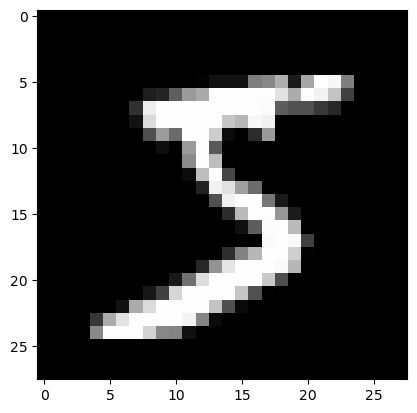

In [14]:
plt.imshow(image.reshape((28,28)),cmap='gray')

In [15]:
imagge,lablee = train_data[100]

In [16]:
lablee

5

In [17]:
imagge

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
imagge.shape

torch.Size([1, 28, 28])

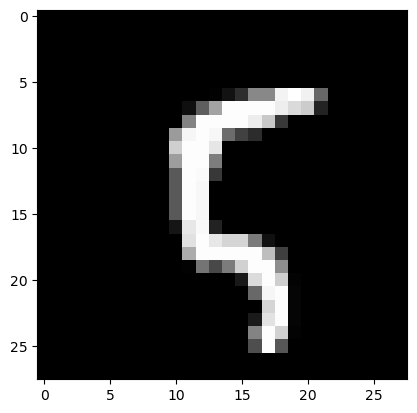

In [19]:
plt.imshow(imagge.reshape((28,28)),cmap='gray')

In [20]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [21]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x : f'{x:4}')) #formatting

In [22]:
#first batch
for images,labels in train_loader:
    #60,000/ 100 60 times
    break
    #1 time only

In [23]:
images.shape

torch.Size([100, 1, 28, 28])

In [24]:
labels.shape

torch.Size([100])

In [25]:
#print the first 12 lables
print('Labels:' , labels[:100].numpy())

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3    5    5
    4    5    4    1    0    4    5    4    5    4    0    5    8    2
    2    3    3    7    2    8    1    2    3    1    7    9    0    4
    9    1    7    9    7    2    6    5    5    8    5    0    4    0
    0    4    9    2    6    0    8    4    1    8    5    2    0    3
    3    4    6    1    5    3    5    9    0    7    4    5    3    6
    6    4    5    3    9    7    1    7    6    7    9    3    5    9
    9    6]


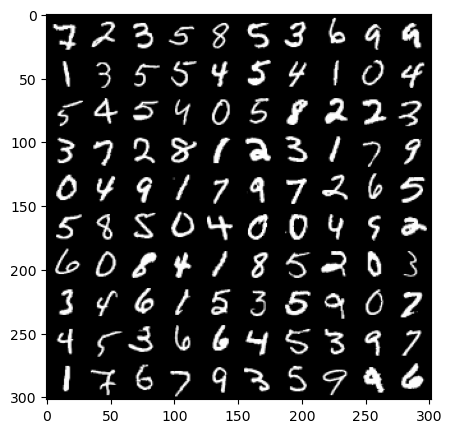

In [26]:
#print the first 12 labels
im = make_grid(images[:100], nrow=10) #the default nrow is 8
plt.figure(figsize=(10,5))
#we need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [27]:
class MultilayerPerceptron(nn.Module):

    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):

        super().__init__()

        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X= F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X,dim=1) #Multi class classification
        

In [28]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [29]:
#ANN ----> CNN
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [31]:
 images.shape # ----. [100,784]

torch.Size([100, 1, 28, 28])

In [32]:
images.view(100,-1).shape

torch.Size([100, 784])

In [35]:
import time

start_time = time.time()
# training

epochs = 10
# trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1

        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 200 == 0:
            acc = trn_corr.item() * 100 / (X_train.size(0) * b)
            print(f'Epoch {i} batch {b} loss: {loss.item()} accuracy: {acc}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(X_test.size(0), -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time / 60} mins')


Epoch 0 batch 200 loss: 0.08650673180818558 accuracy: 96.57
Epoch 0 batch 400 loss: 0.06262712180614471 accuracy: 96.6575
Epoch 0 batch 600 loss: 0.06496366858482361 accuracy: 96.72833333333334
Epoch 1 batch 200 loss: 0.11511607468128204 accuracy: 97.655
Epoch 1 batch 400 loss: 0.05642372742295265 accuracy: 97.485
Epoch 1 batch 600 loss: 0.03264879807829857 accuracy: 97.51333333333334
Epoch 2 batch 200 loss: 0.11097194999456406 accuracy: 98.095
Epoch 2 batch 400 loss: 0.04745318368077278 accuracy: 97.9775
Epoch 2 batch 600 loss: 0.05592361465096474 accuracy: 98.00166666666667
Epoch 3 batch 200 loss: 0.011903823353350163 accuracy: 98.4
Epoch 3 batch 400 loss: 0.036988064646720886 accuracy: 98.475
Epoch 3 batch 600 loss: 0.058318689465522766 accuracy: 98.385
Epoch 4 batch 200 loss: 0.0324258953332901 accuracy: 98.825
Epoch 4 batch 400 loss: 0.06521084904670715 accuracy: 98.7075
Epoch 4 batch 600 loss: 0.09689783304929733 accuracy: 98.68666666666667
Epoch 5 batch 200 loss: 0.0853220522403

In [46]:
train_losses_np = [loss.detach().numpy() for loss in train_losses]
test_losses_np = [loss.detach().numpy() for loss in test_losses]


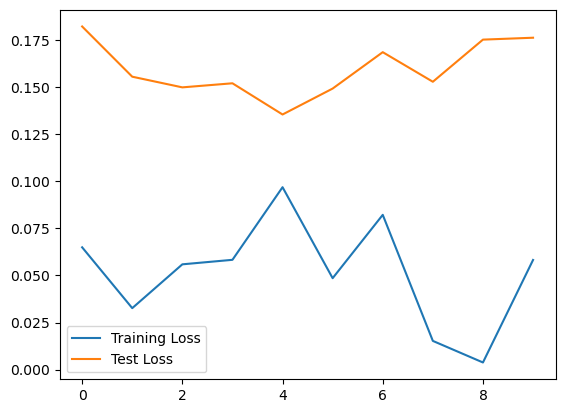

In [47]:
plt.plot(train_losses_np, label='Training Loss')
plt.plot(test_losses_np, label='Test Loss')

plt.legend()

In [50]:
train_acc =[t/600 for t in train_correct]

In [51]:
train_acc

[tensor(96.7283),
 tensor(97.5133),
 tensor(98.0017),
 tensor(98.3850),
 tensor(98.6867),
 tensor(98.9250),
 tensor(99.1500),
 tensor(99.2950),
 tensor(99.3300),
 tensor(99.4300)]

In [52]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [54]:
with torch.no_grad():
    correct = 0

    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [57]:
100*correct.item()/len(test_data)

97.49

In [58]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 971,    0,    9,    0,    3,    2,   13,    1,    5,    2],
       [   1, 1121,    0,    0,    0,    0,    3,    7,    0,    2],
       [   0,    2,  991,    1,    1,    0,    1,    6,    1,    0],
       [   2,    4,   11,  987,    2,    8,    1,    3,    8,    3],
       [   1,    0,    1,    0,  944,    1,    6,    1,    4,    2],
       [   1,    0,    0,   10,    0,  875,   12,    1,    5,    5],
       [   0,    2,    4,    0,    4,    1,  922,    0,    1,    0],
       [   1,    0,    4,    3,    3,    1,    0, 1002,    3,    0],
       [   3,    6,   11,    4,    1,    3,    0,    1,  945,    4],
       [   0,    0,    1,    5,   24,    1,    0,    6,    2,  991]],
      dtype=int64)